# Reconstruction Attack
This is used for testing plotting with circles that are proportional to the number of revisits

In [25]:
def plot_traj_w_circles(path, client, start, end, scale):
    import pandas as pd
    import matplotlib.pyplot as plt
    from collections import defaultdict
    import math
    
    aps = pd.read_csv("/local/traceset1/APlocations.txt", sep=",")
    df = pd.read_csv(path, header='infer')
    
    # query for one person
    one_client = df.query('client == @client')
    # converting timestamp
    trace = one_client[["timestamp", "AP"]].copy()
    trace['timestamp'] = pd.to_datetime(trace['timestamp'])
    # Convert string to datetime format
    start1 = pd.to_datetime(start)
    end1 = pd.to_datetime(end)
    # filtered data between start1 and end1
    mask = (start1<trace['timestamp']) & (end1>trace['timestamp'])
    trace_filtered = trace.loc[mask]
    
    # merge trace with ap locations
    df_m = pd.merge(trace_filtered, aps, on='AP', how="left")
    
    # group the data by 'x_coordinate(m)' and 'y_coordinate(m)' and count the number of occurrences of each pair
    # columns: x_coordinate(m), y_coordinate(m), count
    grouped_data = df_m.groupby(['x_coordinate(m)', 'y_coordinate(m)']).size().reset_index(name='count')
    
    # create a dictionary to store the count of each (x_coordinate(m), y_coordinate(m)) pair
    # e.g. {(1.0,2.0): 5, ...}
    coordinate_count = defaultdict(int)
    for index, row in grouped_data.iterrows():
        coordinate_count[(row['x_coordinate(m)'], row['y_coordinate(m)'])] = row['count']
    
    # Find the maximum count to normalize the circle radius
    max_count = max(coordinate_count.values())
    
    # Scaling factor for the circle radius
    scaling_factor = scale
    
    # Sort the data by timestamp
    sorted_data = df_m.sort_values(by='timestamp')
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Connect coordinate pairs with lines
    ax.plot(sorted_data['x_coordinate(m)'], sorted_data['y_coordinate(m)'], linestyle='dotted', marker='o', color='lightblue')

    # Plot the circles
    for coordinates, count in coordinate_count.items():
        x, y = coordinates
        # normalized_radius = (count / max_count) * scaling_factor # linear 
        normalized_radius = math.log(count + 1) * scaling_factor # logrithmic scaling
        circle = plt.Circle((x, y), normalized_radius, edgecolor='black', facecolor='none', linewidth=1)
        ax.add_patch(circle)
        ax.annotate(f"{count}", xy=(x, y), ha='center', va='center')

    # Set axis labels
    ax.set_xlabel('x_coordinate(m)')
    ax.set_ylabel('y_coordinate(m)')

    # Set plot title
    ax.set_title('X vs Y coordinates with circle radius proportional to frequency')

    # Set equal aspect ratio
    ax.set_aspect('equal', 'box')

    # Display the plot
    plt.show()

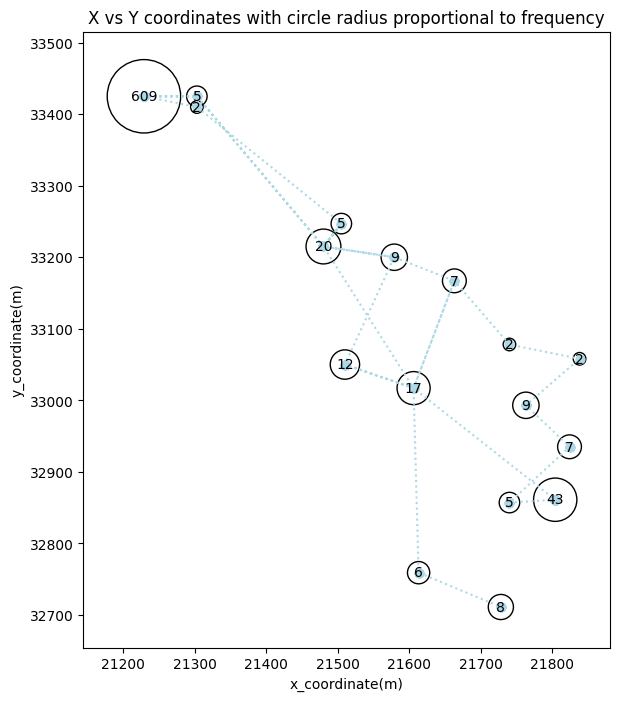

In [26]:
plot_traj_w_circles("/local/traceset1/2014_09.csv.gz", "264a4be82a5b938f19b680eb4e3269405bc9021b", '2014-09-09', '2014-09-10', 8)